<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/1%EC%A3%BC%EC%B0%A85%EC%9D%BC_12_multi_nn_tree_rf_svm_%EB%B9%84%EA%B5%90_%ED%8E%AD%EA%B7%84_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN 다중분류 펭귄 데이터셋

In [ ]:
! pip install ipython-autotime

time: 12.2 s (started: 2024-06-28 06:39:58 +00:00)


In [ ]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.21 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns

time: 658 µs (started: 2024-06-28 06:40:10 +00:00)


##1. 데이터 준비

In [ ]:
# ! wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

time: 359 µs (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
penguin = pd.read_csv('penguins.csv')

time: 4.81 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
penguin.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 38.7 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
penguin.shape

(344, 7)

time: 7.61 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df = penguin.copy()

time: 858 µs (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 30.5 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df.columns

Index(['Species', 'Island', 'Culmen Length(mm)', 'Culmen Depth(mm)',
       'Flipper Length(mm)', 'Body Mass(g)', 'Sex'],
      dtype='object')

time: 3.34 ms (started: 2024-06-28 06:40:10 +00:00)


## 칼럼명 전처리 !

In [ ]:
df.columns = [col.lower().replace(' ','_').replace('(','_').replace(')','') for col in df.columns]

time: 1.29 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 34.7 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 10 ms (started: 2024-06-28 06:40:10 +00:00)


섬이랑 성별 원 핫 인코딩 필요한것 같다. 나머지 수치형은 표준화

In [ ]:
df.shape

(344, 7)

time: 5.17 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


time: 37.3 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 6.48 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
df.duplicated().sum()


0

time: 7.33 ms (started: 2024-06-28 06:40:10 +00:00)


## 범주형 변수

In [ ]:
col_cate=df.select_dtypes(include=['object'])
col_cate

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


time: 22.4 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
col_cate.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

time: 3.58 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
col_cate['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

time: 7.86 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
col_cate['island'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 9.81 ms (started: 2024-06-28 06:40:10 +00:00)


- 성별에 .이라는 결측치가 존재

In [ ]:
col_cate['sex'].value_counts()
col_cate.loc[col_cate['sex']=='.']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 13.7 ms (started: 2024-06-28 06:40:10 +00:00)


In [ ]:
col_cate.loc[col_cate['sex']=='.'] = 'FEMALE'

time: 1.83 ms (started: 2024-06-28 06:40:11 +00:00)


In [ ]:
df.sex.value_counts()
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 9.96 ms (started: 2024-06-28 06:40:11 +00:00)


<Axes: xlabel='sex', ylabel='count'>

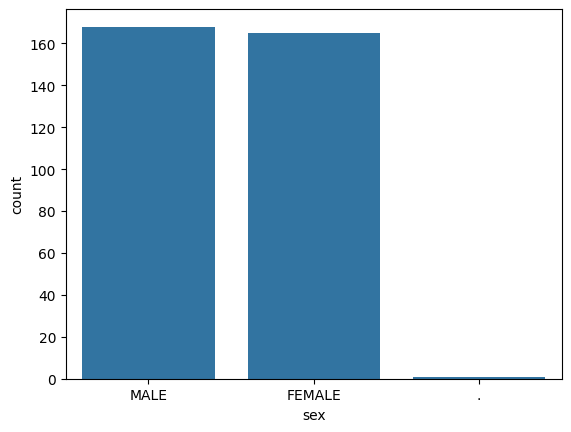

time: 504 ms (started: 2024-06-28 06:40:11 +00:00)


In [ ]:
sns.countplot(x=df['sex'])

# 데이터 그루핑

In [ ]:
g=df.groupby('island')['species'].value_counts() # Torgersen 섬에는 Adelie만 있다. 실제로 Torgersen섬에 Adelie만 사는지 인터넷 검색필요 (EDA 할 적에)

time: 5.22 ms (started: 2024-06-28 06:40:11 +00:00)


# 연속형 변수

In [ ]:
col_nums =df.select_dtypes(include=['number'])
col_nums

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


time: 35.9 ms (started: 2024-06-28 06:40:11 +00:00)


## 이상치
  - 박스 플롯 시각화

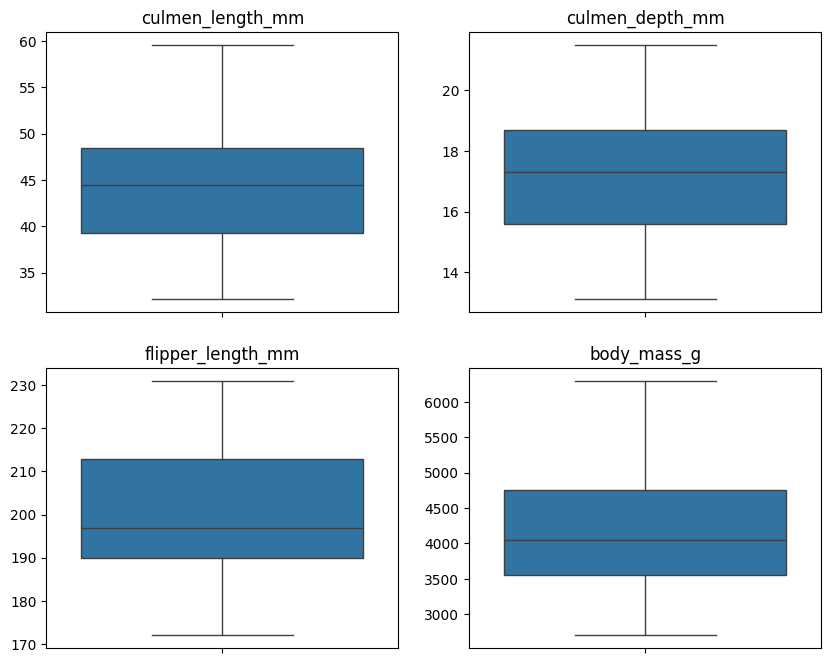

time: 1e+03 ms (started: 2024-06-28 06:40:11 +00:00)


In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
axes = axes.flatten()

for i,col in enumerate(col_nums):
  sns.boxplot(y=col,data=col_nums,ax=axes[i])
  axes[i].set_xlabel(None)
  axes[i].set_ylabel(None)
  axes[i].set_title(col)

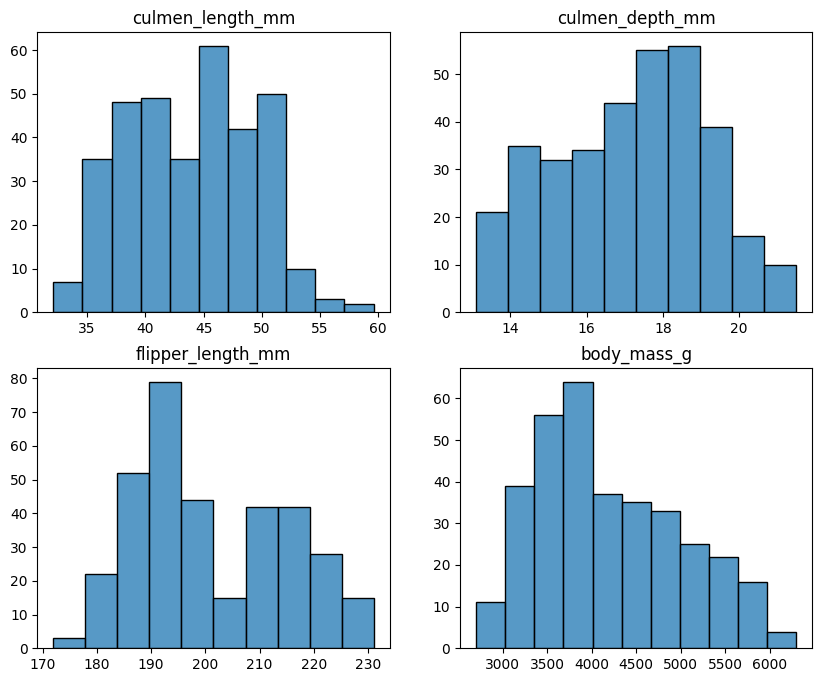

time: 1.4 s (started: 2024-06-28 06:40:12 +00:00)


In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
axes = axes.flatten()
for i,col in enumerate(col_nums):
  sns.histplot(x=col,data=col_nums,ax=axes[i])
  axes[i].set_xlabel(None)
  axes[i].set_ylabel(None)
  axes[i].set_title (col)



# 2.데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.2,random_state=42,stratify=df['species'])

time: 16.7 ms (started: 2024-06-28 06:40:14 +00:00)


In [ ]:
df_train.shape, df_test.shape

((275, 7), (69, 7))

time: 6.5 ms (started: 2024-06-28 06:40:14 +00:00)


In [ ]:
df_train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 12.2 ms (started: 2024-06-28 06:40:14 +00:00)


- **heatmap으로 결측치 확인**

<Axes: >

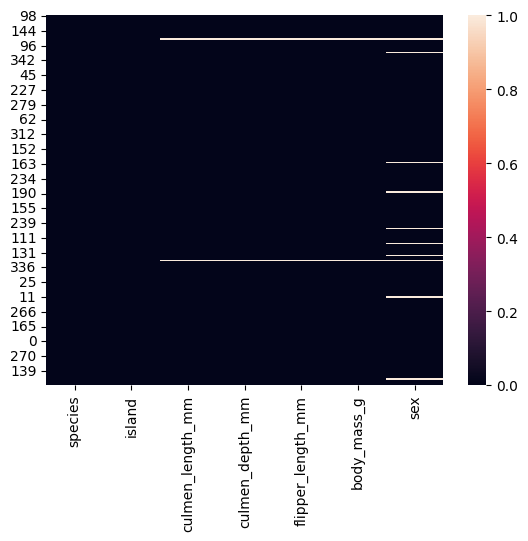

time: 845 ms (started: 2024-06-28 06:40:14 +00:00)


In [ ]:
sns.heatmap(df_train.isna()) # 결측치 True가 하얀색

In [ ]:
df_train.dropna(inplace=True)

time: 2.32 ms (started: 2024-06-28 06:40:15 +00:00)


In [ ]:
df_train.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

time: 9.04 ms (started: 2024-06-28 06:40:15 +00:00)


# X,y 분리

In [ ]:
X_train = df_train.drop('species',axis=1)
y_train = df_train['species']
X_train.shape, y_train.shape

((265, 6), (265,))

time: 10.2 ms (started: 2024-06-28 06:40:15 +00:00)


In [ ]:
X_train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,265.000000,265.000000,265.000000,265.000000
mean,44.163396,17.183019,200.969811,4220.754717
std,5.499668,2.007084,13.911756,809.351941
min,33.100000,13.100000,172.000000,2700.000000
25%,39.600000,15.600000,190.000000,3550.000000
50%,45.100000,17.300000,197.000000,4050.000000
75%,48.700000,18.800000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


time: 60.2 ms (started: 2024-06-28 06:40:15 +00:00)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_train[['island','sex']]=oe.fit_transform(X_train[['island','sex']])

time: 7.21 ms (started: 2024-06-28 06:40:15 +00:00)


In [ ]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,1.0
114,0.0,39.6,20.7,191.0,3900.0,1.0
118,2.0,35.7,17.0,189.0,3350.0,1.0
303,0.0,50.0,15.9,224.0,5350.0,2.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


time: 51.6 ms (started: 2024-06-28 06:40:15 +00:00)


# 다중 분류 NN이라 원핫 인코딩 필요

In [ ]:
y_train = y_train.to_numpy()
y_train.shape

(265,)

time: 4.25 ms (started: 2024-06-28 06:40:15 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_train_e =le.fit_transform(y_train)
y_train_e

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 6.82 ms (started: 2024-06-28 06:40:20 +00:00)


### 원 핫 인코딩

In [ ]:
from keras import utils

y_train_o=utils.to_categorical(y_train_e)
y_train_o, y_train_o.shape

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1

time: 19.4 ms (started: 2024-06-28 06:43:17 +00:00)


## 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       ...,
       [ 1.        , -0.25274725,  0.375     , -0.08695652,  0.16      ,
         0.        ],
       [ 1.        , -0.92307692,  0.46875   , -0.43478261, -0.2       ,
        -1.        ],
       [ 0.        ,  0.62637363,  0.53125   ,  0.56521739,  0.04      ,
         0.        ]])

time: 13.4 ms (started: 2024-06-28 06:42:21 +00:00)


#3. 모델학습

In [ ]:
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s),type(y_train_o))

(265, 6) (265, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 2.3 ms (started: 2024-06-28 06:43:34 +00:00)


In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16,activation='relu',input_shape=(6,)),
    layers.Dense(units=8,activation='relu'),
    layers.Dense(units=3,activation='softmax'),


])

time: 143 ms (started: 2024-06-28 06:43:37 +00:00)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                112       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 26.8 ms (started: 2024-06-28 06:43:41 +00:00)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
 metrics=['accuracy'])

time: 30.5 ms (started: 2024-06-28 06:43:55 +00:00)


In [ ]:
EPOCHS=100
BATCH_SIZE=16
history= model.fit(X_train_s,y_train_o,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/100
14/14 [==============================] - 2s 23ms/step - loss: 1.0399 - accuracy: 0.4434 - val_loss: 1.0507 - val_accuracy: 0.3962
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9868 - accuracy: 0.5613 - val_loss: 1.0077 - val_accuracy: 0.5472
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9342 - accuracy: 0.7547 - val_loss: 0.9619 - val_accuracy: 0.5849
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8772 - accuracy: 0.7925 - val_loss: 0.9136 - val_accuracy: 0.6415
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.8208 - accuracy: 0.8396 - val_loss: 0.8637 - val_accuracy: 0.6415
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7639 - accuracy: 0.8538 - val_loss: 0.8157 - val_accuracy: 0.6415
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7081 - accuracy: 0.8585 - val_loss: 0.7678 - val_accuracy: 0.6981
Epoch 8/100


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


time: 1.08 ms (started: 2024-06-28 06:46:29 +00:00)


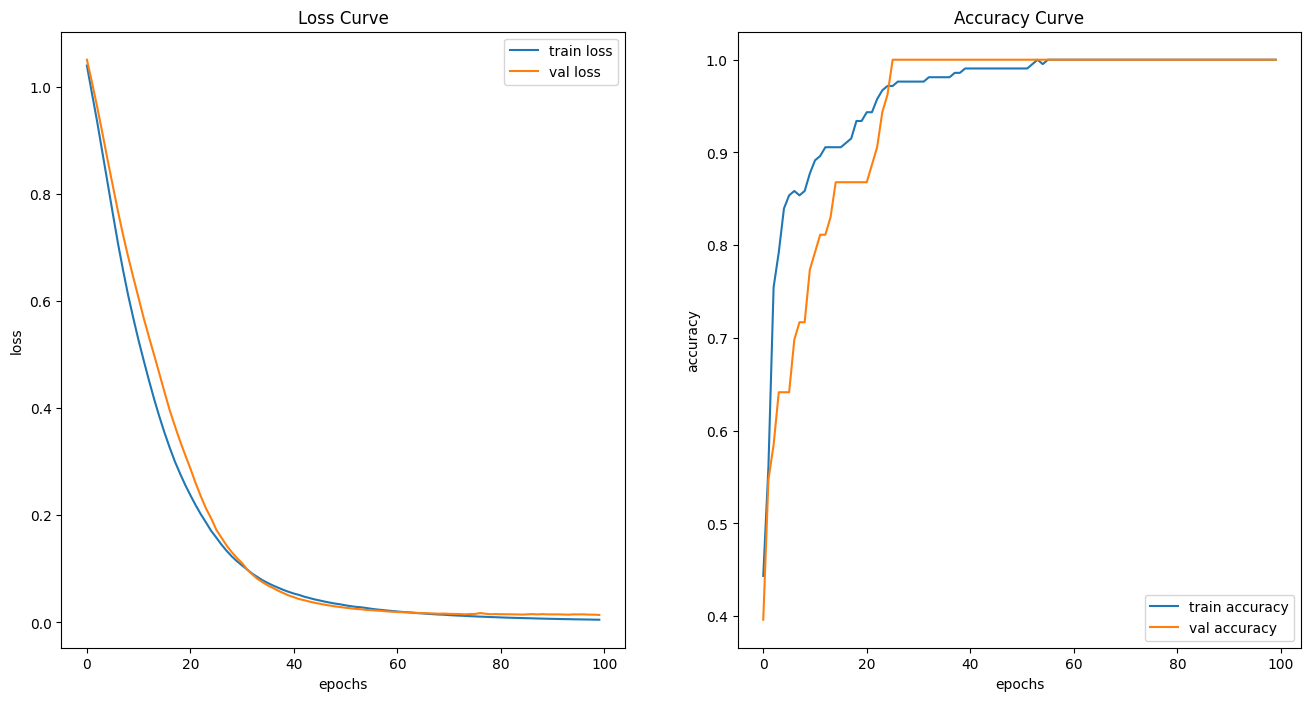

time: 513 ms (started: 2024-06-28 06:46:41 +00:00)


In [ ]:
plot_history(history)

In [ ]:
df_test = df_test.dropna() # or df_test.dropna(inplace=True)
X_test = df_test.drop('species',axis=1)
y_test = df_test['species']
X_test.shape, y_test.shape


((69, 6), (69,))

time: 8.56 ms (started: 2024-06-28 06:47:52 +00:00)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_test[['island','sex']]=oe.fit_transform(X_test[['island','sex']])

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_test_e =le.fit_transform(y_test)
y_test_e

from keras import utils
y_test_o = utils.to_categorical(y_test_e)

from sklearn.preprocessing import StandardScaler
rs=StandardScaler()
X_test_s = rs.fit_transform(X_test)
X_test_s
y_test_o
y_test_e

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 2])

time: 18.7 ms (started: 2024-06-28 06:57:08 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 3ms/step


array([[9.9961895e-01, 1.8477967e-04, 1.9626615e-04],
       [9.9997991e-01, 1.0095903e-05, 9.9246427e-06],
       [3.5715464e-05, 7.3291347e-05, 9.9989086e-01],
       [7.3218638e-05, 3.1315551e-06, 9.9992353e-01],
       [2.5325798e-04, 9.9974668e-01, 9.7588213e-08],
       [9.9090254e-01, 8.7774321e-03, 3.1996577e-04],
       [4.9687334e-04, 9.9949557e-01, 7.5582666e-06],
       [1.1338666e-04, 5.3419703e-06, 9.9988121e-01],
       [4.5952223e-05, 9.9995333e-01, 7.2771871e-07],
       [1.4034976e-04, 9.9985623e-01, 3.3652011e-06],
       [9.9999994e-01, 5.4761790e-10, 7.2363129e-09],
       [3.0677962e-05, 8.9726450e-07, 9.9996835e-01],
       [1.8204943e-03, 9.9817294e-01, 6.5599479e-06],
       [2.1379447e-04, 8.9109453e-05, 9.9969709e-01],
       [6.6542030e-05, 2.4242420e-04, 9.9969101e-01],
       [1.1525851e-05, 1.0262738e-05, 9.9997813e-01],
       [9.9801946e-01, 6.5436825e-04, 1.3260837e-03],
       [9.9999446e-01, 3.4654176e-06, 1.9732233e-06],
       [5.2638003e-04, 3.283

time: 95 ms (started: 2024-06-28 06:56:10 +00:00)


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]


array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1])

time: 6.63 ms (started: 2024-06-28 06:56:13 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='macro'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

time: 1.35 ms (started: 2024-06-28 06:56:17 +00:00)


In [ ]:
confusion_matrix(y_test_e,y_pred)

array([[30,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

time: 5.57 ms (started: 2024-06-28 06:56:30 +00:00)


accuracy 1.0
recall 1.0
precision 1.0
f1_score 1.0


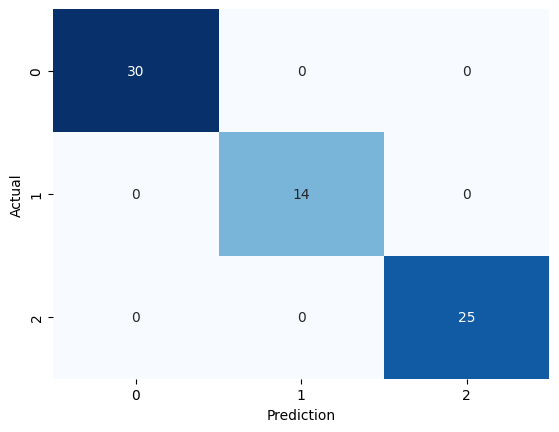

time: 174 ms (started: 2024-06-28 06:56:35 +00:00)


In [ ]:
print_metrics(y_test_e,y_pred)

# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(n_estimators=100,random_state=42)
clf_r.fit(X_train_s,y_train_e)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf_r.predict(X_test_s)

In [ ]:
confusion_matrix(y_test_e,y_pred)

array([[29,  1,  0],
       [ 3, 11,  0],
       [ 0,  0, 25]])

accuracy 0.9420289855072463
recall 0.9174603174603174
precision 0.9409722222222222
f1_score 0.9272125723738626


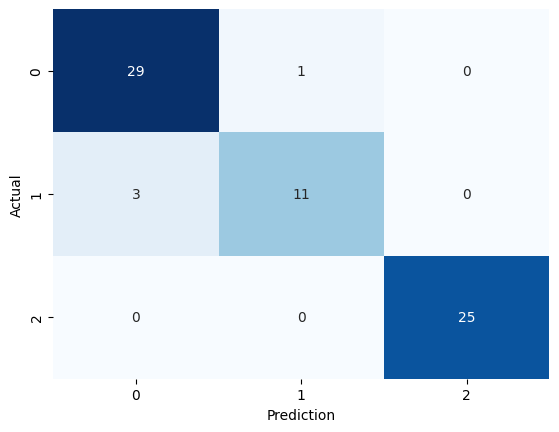

In [ ]:
print_metrics(y_test_e,y_pred)

accuracy 0.9420289855072463
recall 0.9174603174603174
precision 0.9409722222222222
f1_score 0.9272125723738626


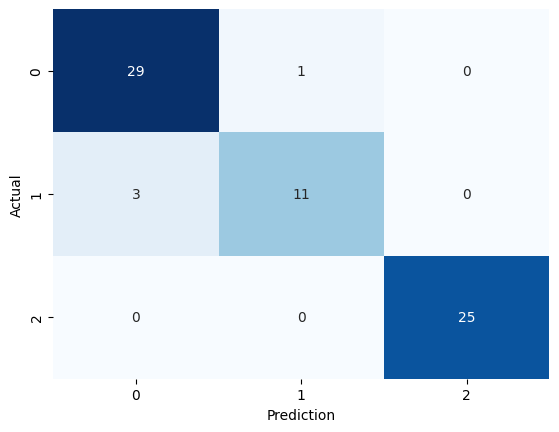

In [ ]:
print_metrics(y_test_e,y_pred)

accuracy 0.9420289855072463
recall 0.9174603174603174
precision 0.9409722222222222
f1_score 0.9272125723738626


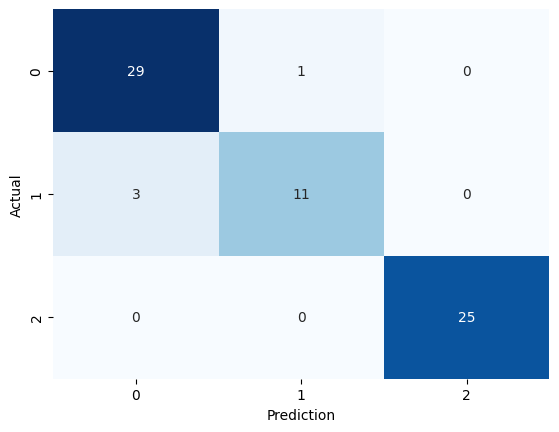

In [ ]:
print_metrics(y_test_e,y_pred)

## SVC

In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
clf.fit(X_train_s,y_train_e)

SVC(random_state=42)

In [ ]:
y_pred_svc = clf.predict(X_test_s)

accuracy 0.8840579710144928
recall 0.8095238095238096
precision 0.9298245614035089
f1_score 0.8274509803921569


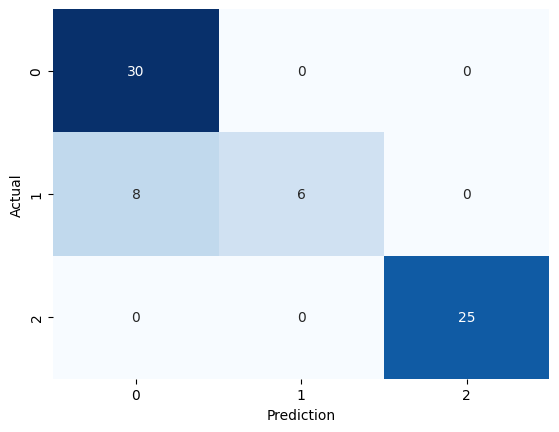

In [ ]:
print_metrics(y_test_e,y_pred_svc)